In [11]:
import numpy as np
import pandas as pd

In [12]:
cars = pd.read_csv('car_data.csv')

In [13]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
cars.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
cars = pd.get_dummies(cars, columns=['Fuel_Type','Selling_type','Transmission','Owner'], drop_first = True)

In [17]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Owner_1,Owner_3
0,ritz,2014,3.35,5.59,27000,0,1,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,1,0,0


In [18]:
independent = ['Year','Present_Price', 'Driven_kms','Fuel_Type_Diesel','Fuel_Type_Petrol', 'Selling_type_Individual','Transmission_Manual','Owner_1','Owner_3']
X = cars[independent]
y = cars['Selling_Price']

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Owner_1,Owner_3
0,2014,5.59,27000,0,1,0,1,0,0
1,2013,9.54,43000,1,0,0,1,0,0
2,2017,9.85,6900,0,1,0,1,0,0
3,2011,4.15,5200,0,1,0,1,0,0
4,2014,6.87,42450,1,0,0,1,0,0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

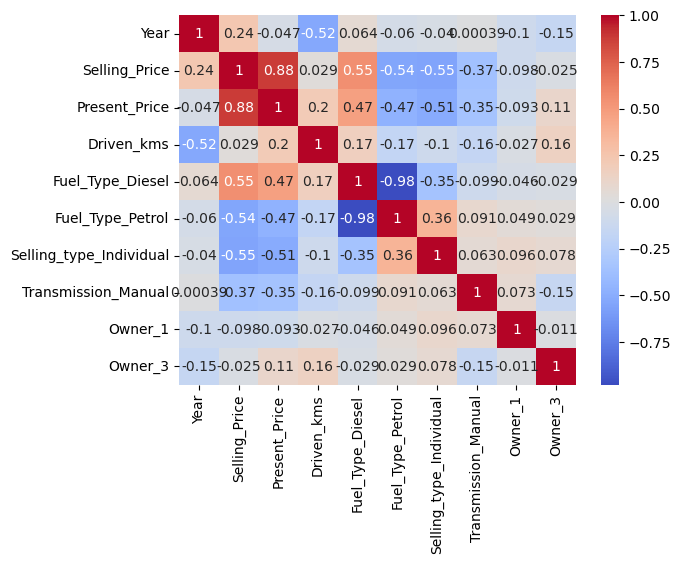

In [26]:
corr_matrix=cars.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=50)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor(n_estimators=100,random_state=50)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=50)

In [31]:
y_pred=model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse = ",mse)
print("r2_score = ",r2)

mse =  1.092104513770493
r2_score =  0.9582257972512196
